In [24]:
%load_ext autoreload
%autoreload 2

import sympy as sp
from qbee import *
from visualization import visualize

sp.init_printing()

x, y, z = sp.symbols('x, y, z')
dot_x, dot_y, dot_z = derivatives('x, y, z')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\а\IdeaProjects\QBee\PythonPackage\quadratic_linearization.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm import tqdm


### Simple systems

In [25]:
system = EquationSystem([
    sp.Eq(dot_x, x**3)
])

system.equations

In [26]:
quadratic_linearize(system).equations

In [27]:
system = EquationSystem([
    sp.Eq(dot_x, x**3),
    sp.Eq(dot_y, x * z**2),
    sp.Eq(dot_z, z)
])

system.equations

In [28]:
quadratic_linearize(system).equations

# Example 6.3.5 from [article](https://www2.eecs.berkeley.edu/Pubs/TechRpts/2012/EECS-2012-217.pdf)

There are several methods to quadratic-linearize a system.

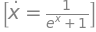

In [29]:
system = EquationSystem([
    sp.Eq(dot_x, 1 / (1 + sp.exp(x)))
])

system.equations

In [30]:
poly_system = polynomialize(system)
poly_system.equations


In [31]:
ql_system = quadratic_linearize(poly_system, mode='optimal', method_optimal='bfs', log_file='log.csv')
ql_system.equations

In [32]:
ql_system.statistics

steps: 2
Method's name: BFS
depth: 1

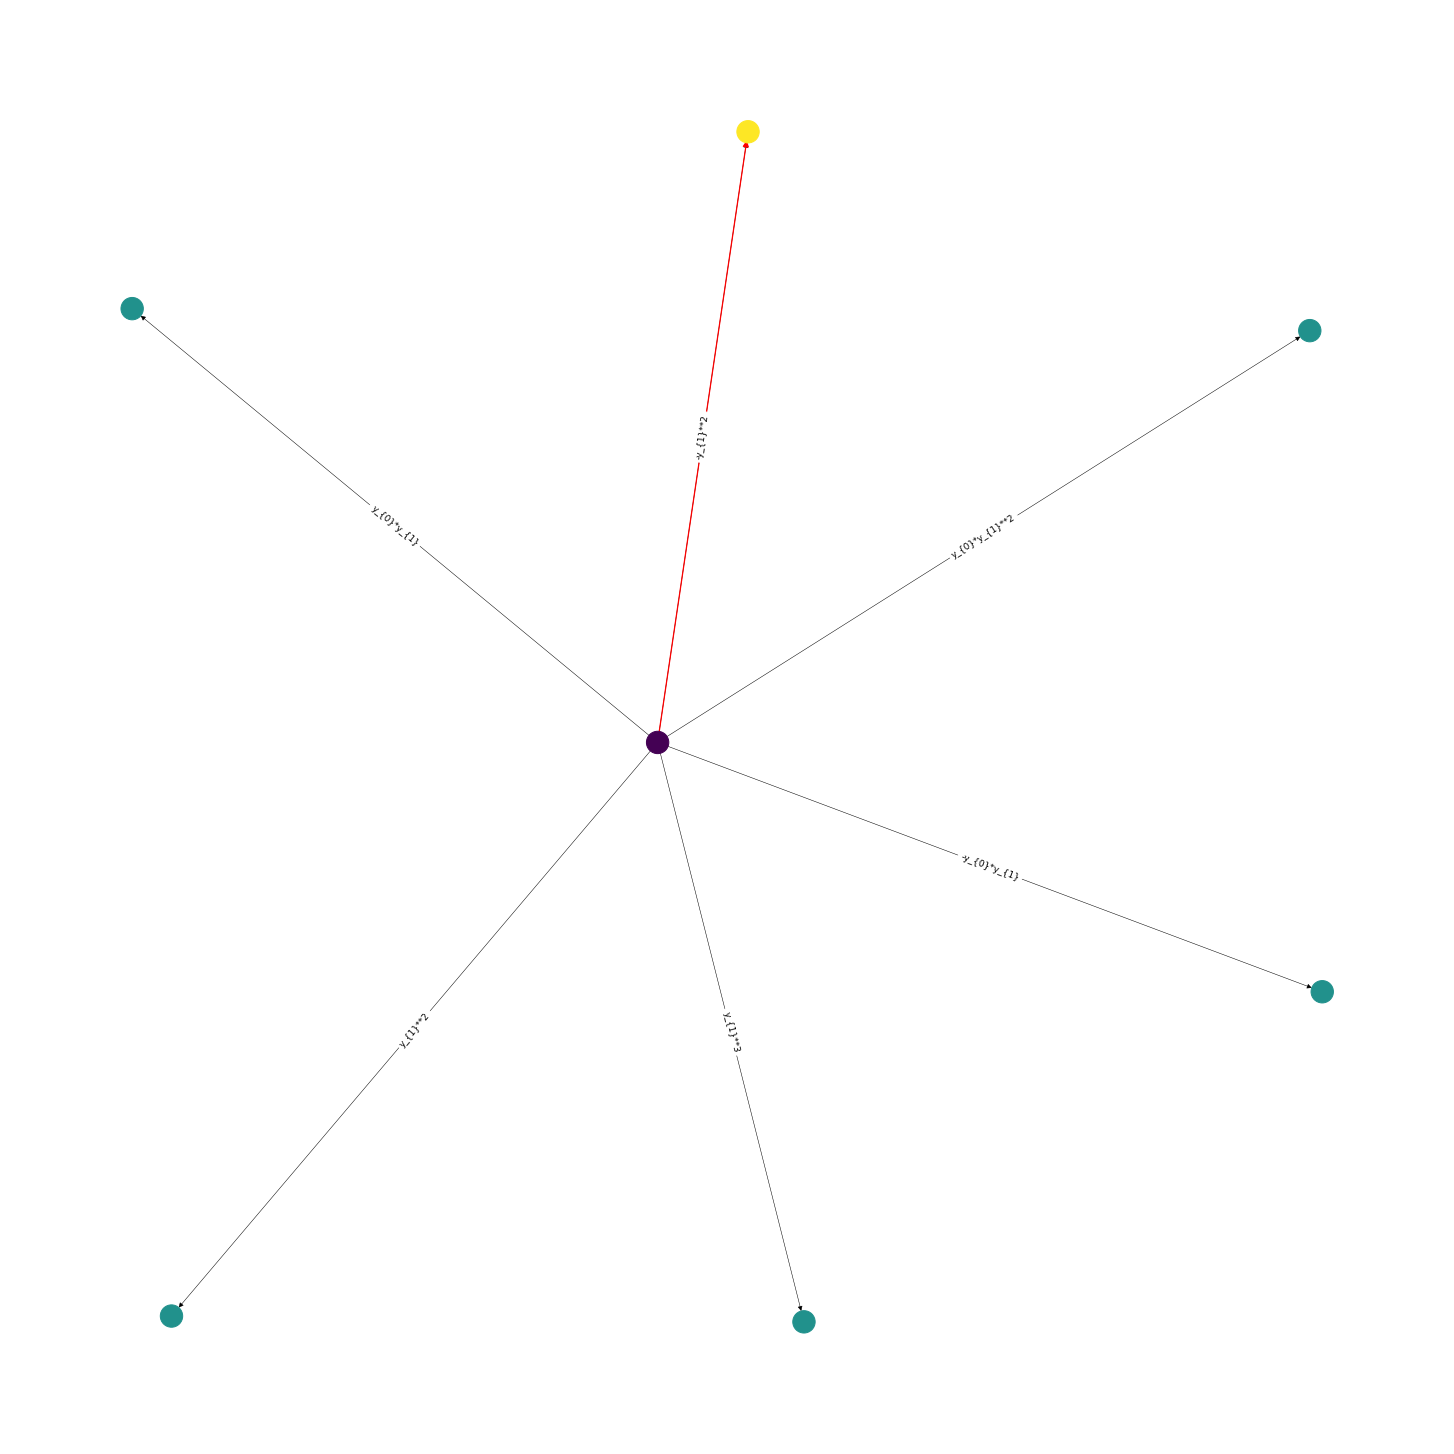

In [33]:
visualize('log.csv', figsize=(20, 20), node_size=500, edge_width=0.5, edge_label_font_size=9)


In [34]:
ql_system = quadratic_linearize(poly_system, mode='optimal', method_optimal='iddfs',  log_file='log.csv')
ql_system.equations

In [35]:
ql_system.statistics

steps: 2
Method's name: ID-DFS
depth: 1

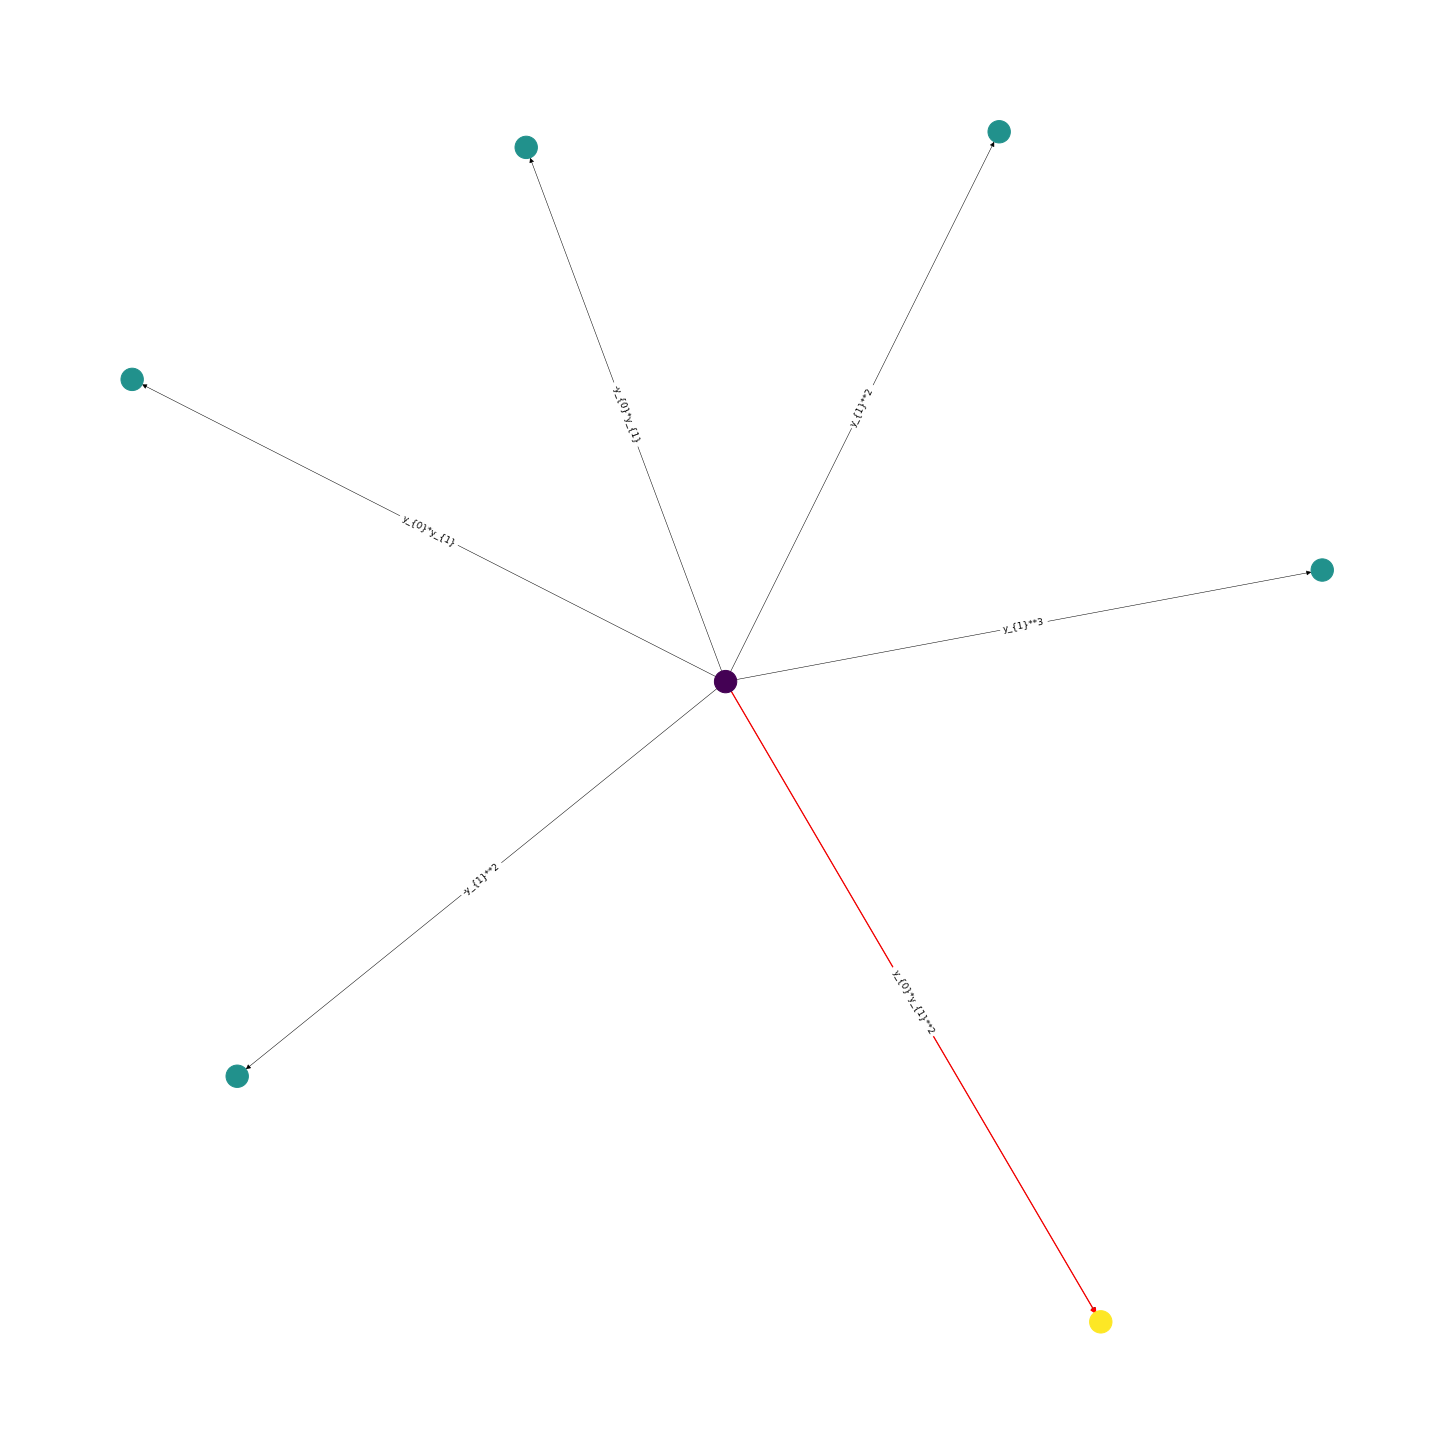

In [36]:
visualize('log.csv', figsize=(20, 20), node_size=500, edge_width=0.5, edge_label_font_size=9)


# $x^2y^2z^2$ Example

In [37]:
w = sp.symbols('w')
dot_w = derivatives('w')

system = EquationSystem([
    sp.Eq(dot_x, 0),
    sp.Eq(dot_y, 0),
    sp.Eq(dot_z, 0),
    sp.Eq(dot_w, x**2 * y**2 * z**2)
])

poly_system = polynomialize(system)

poly_system.equations

In [38]:
ql_system = quadratic_linearize(poly_system, mode='optimal', method_optimal='bfs', log_file='log.csv')
ql_system.equations

In [39]:
ql_system.statistics

steps: 16
Method's name: BFS
depth: 1

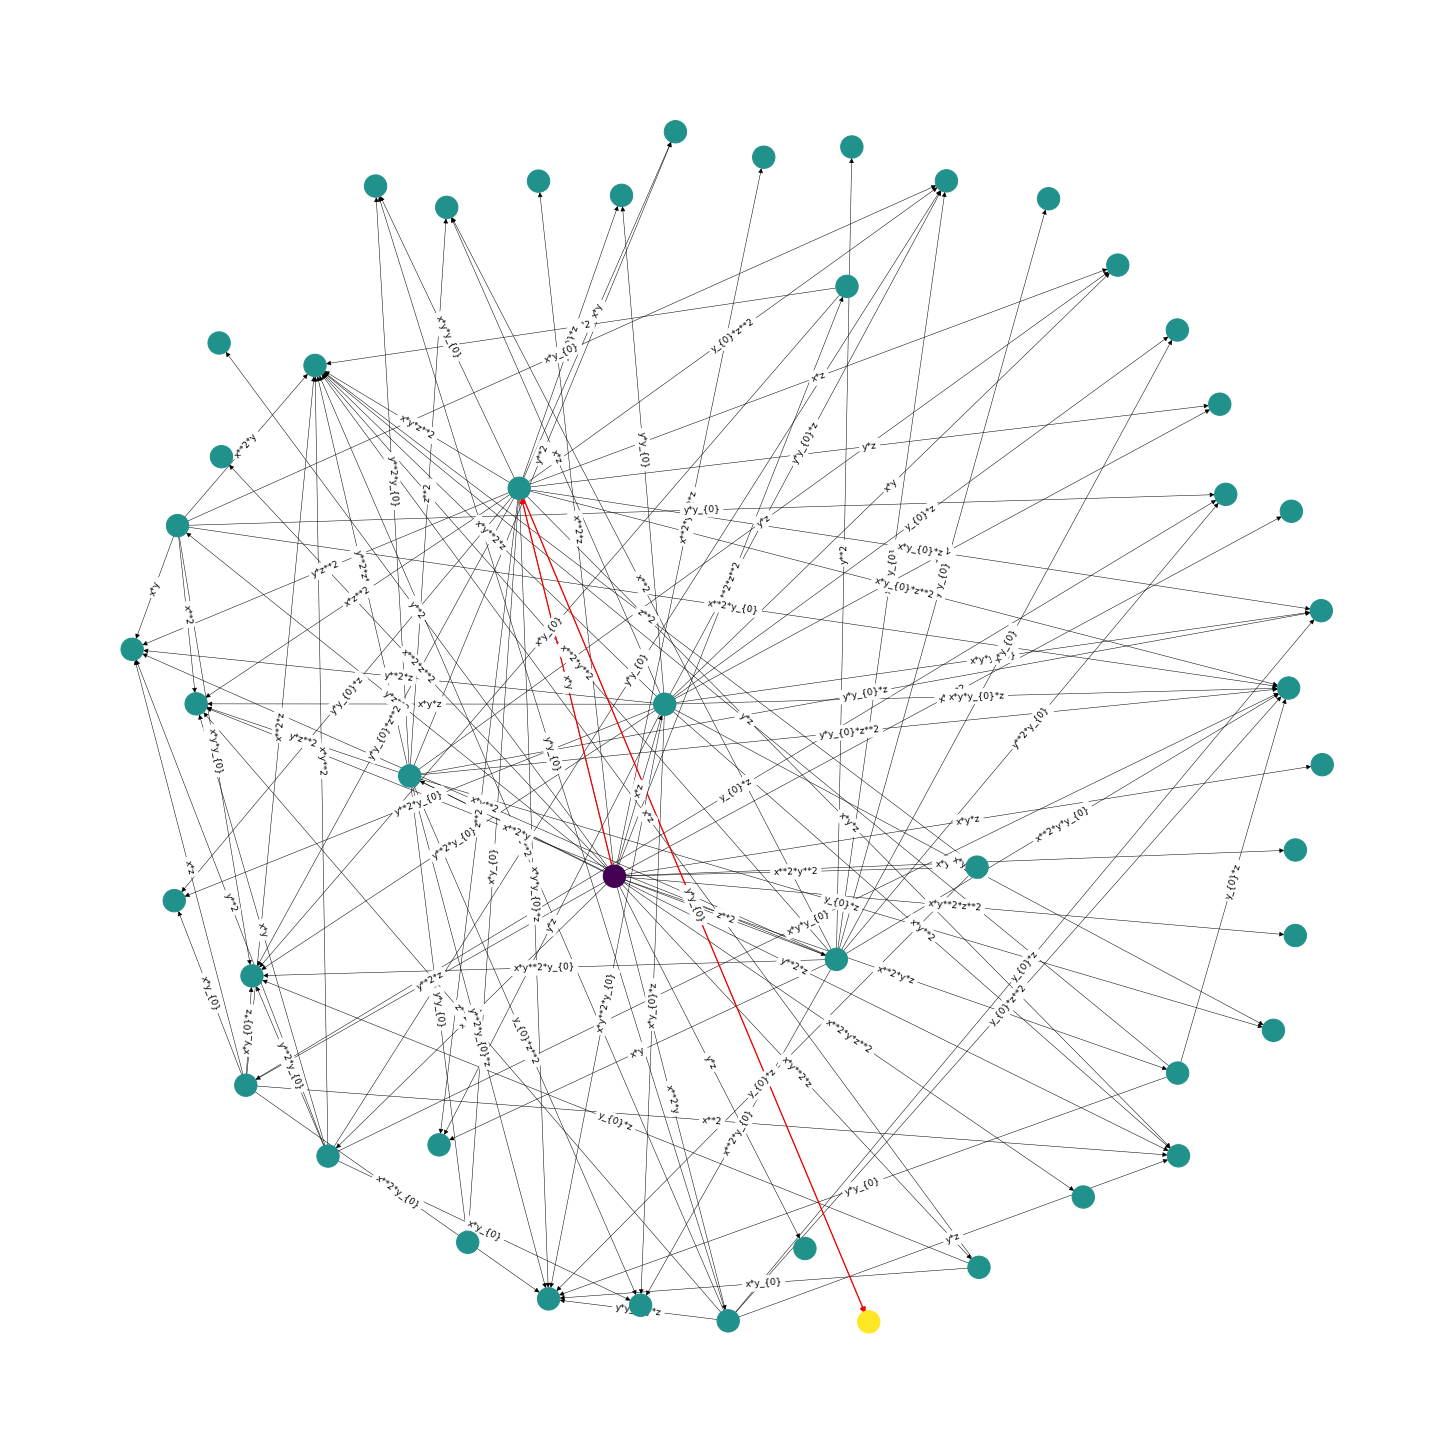

In [40]:
visualize('log.csv', figsize=(20, 20), node_size=500, edge_width=0.5, edge_label_font_size=9)


In [41]:
ql_system = quadratic_linearize(poly_system, mode='optimal', method_optimal='iddfs', log_file='log.csv')
ql_system.equations

In [42]:
ql_system.statistics

steps: 2
Method's name: ID-DFS
depth: 1

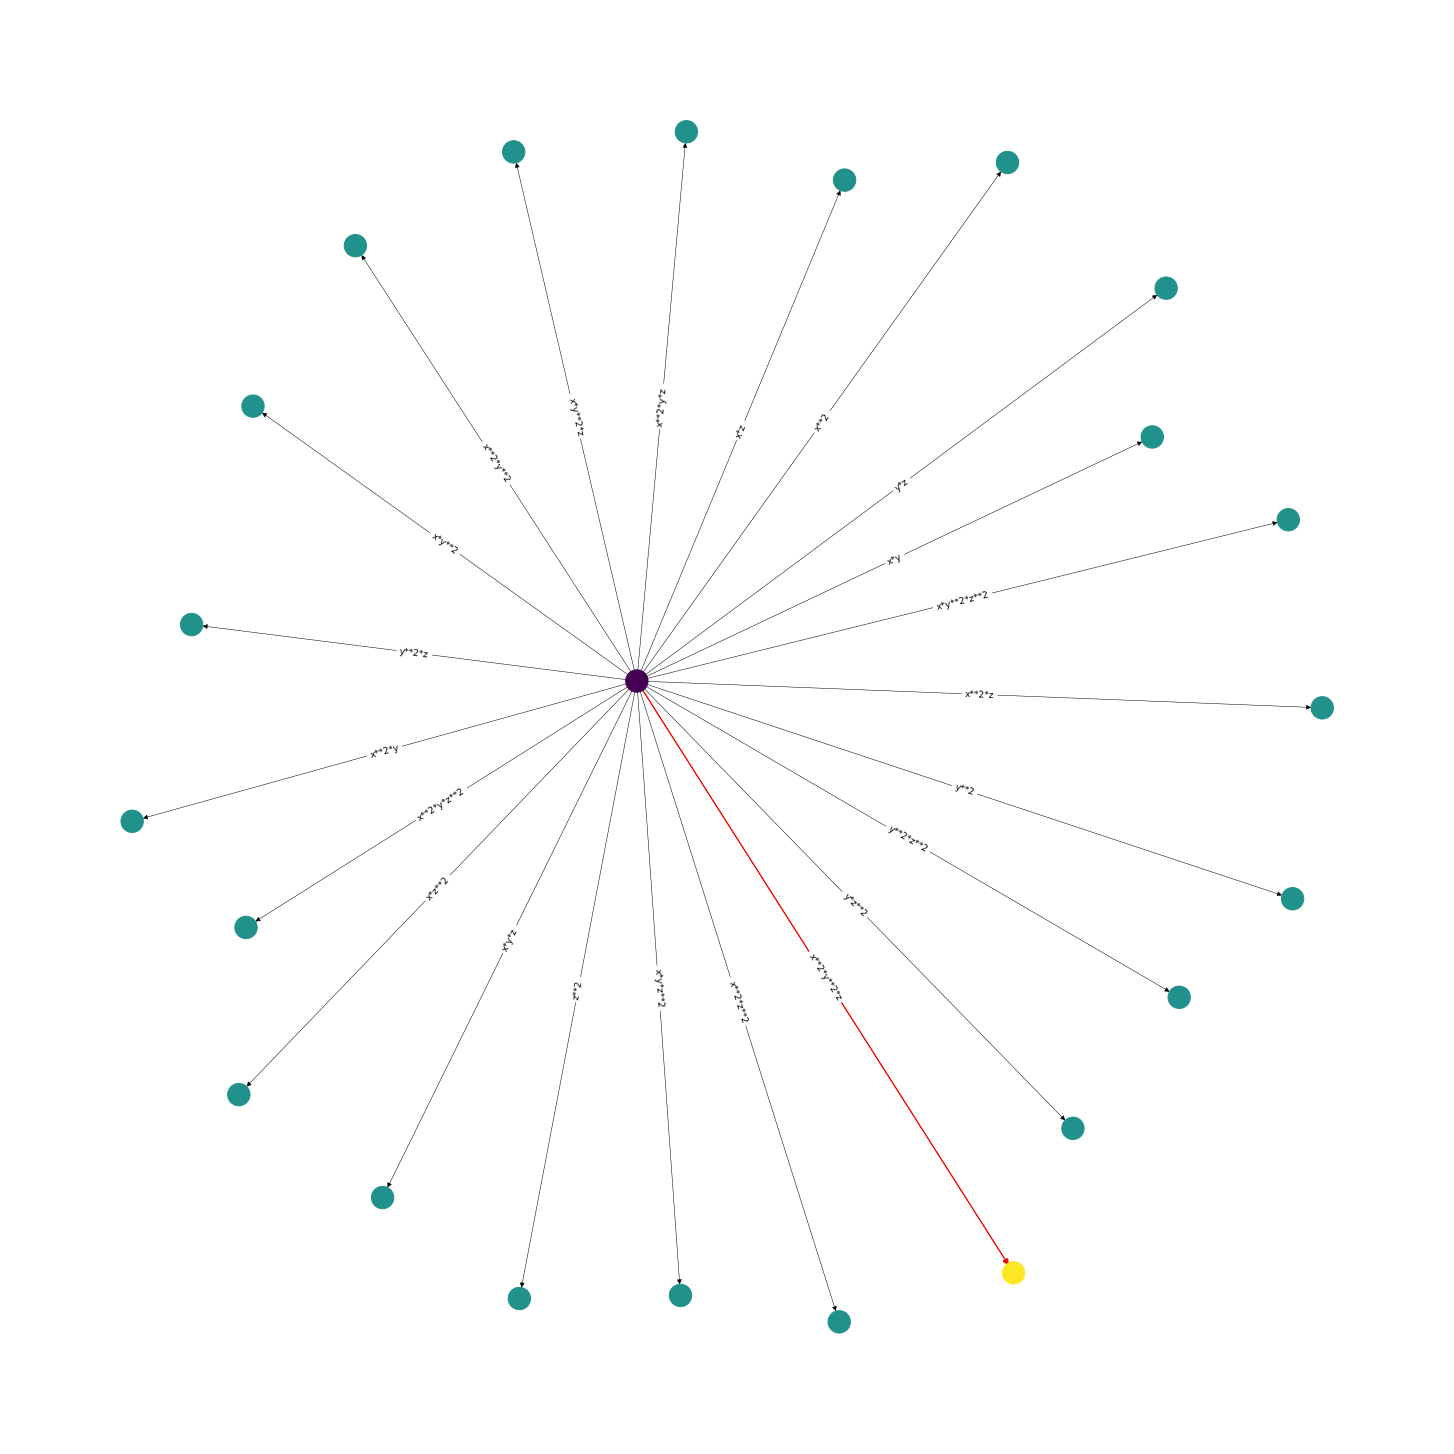

In [43]:
visualize('log.csv', figsize=(20, 20), node_size=500, edge_width=0.5, edge_label_font_size=9)

# Tough Example

In [44]:
system = EquationSystem([
    sp.Eq(dot_x, x / (1 + sp.exp(x))),
])

system.equations

In [45]:
poly_system = polynomialize(system)
poly_system.equations

## BFS

In [46]:
ql_system = quadratic_linearize(poly_system, method_optimal='bfs', limit_depth=2, debug='info', log_file='log.csv')
ql_system.equations

In [47]:
ql_system.statistics

steps: 309
Method's name: BFS
depth: 2

## Tuned ID-DFS

In [48]:
ql_system = quadratic_linearize(poly_system, method_optimal='iddfs', heuristics='default',
                                initial_max_depth=2, limit_depth=2, debug='info', log_file='log.csv')
ql_system.equations

In [49]:
ql_system.statistics


steps: 12
Method's name: ID-DFS
depth: 2